### All import 

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
file = uproot.open("./root_pandas/dose-rank000.root")

In [3]:
trees = file.keys()

In [4]:
print("All tree in the .root is", trees)

All tree in the .root is ['ETot_CCD1;1', 'ETot_CCD2;1', 'ETot_CCD3;1', 'ETot_CCD4;1', 'ETot_CCD5;1', 'ETot_CCD6;1', 'ETot_CCD7;1', 'ETot_CCD8;1', 'ETot_CCD9;1', 'ETot_CCD10;1', 'Primary energy;1', 'muonCCD1;1', 'muonCCD2;1', 'muonCCD3;1', 'muonCCD4;1', 'muonCCD5;1', 'muonCCD6;1', 'muonCCD7;1', 'muonCCD8;1', 'muonCCD9;1', 'muonCCD10;1', 'allCCD1;2', 'allCCD1;1', 'allCCD2;2', 'allCCD2;1', 'allCCD3;2', 'allCCD3;1', 'allCCD4;2', 'allCCD4;1', 'allCCD5;2', 'allCCD5;1', 'allCCD6;2', 'allCCD6;1', 'allCCD7;2', 'allCCD7;1', 'allCCD8;2', 'allCCD8;1', 'allCCD9;2', 'allCCD9;1', 'allCCD10;2', 'allCCD10;1', 'hprof2d21;1', 'hprof2d22;1', 'hprof2d23;1', 'hprof2d24;1', 'hprof2d25;1', 'hprof2d26;1', 'hprof2d27;1', 'hprof2d28;1', 'hprof2d29;1', 'hprof2d210;1']


### Ramas a Explorar


- [x] ETot_CCD1 
- [ ] Primary energy
- [x] muonCCD
- [x] allCCD1
- [x] hprof2d21

In [56]:
branch1 = file['muonCCD1;1']

## muon CCD 
exploration in the all tree muonCCD

In [5]:
branch1 = file['muonCCD1;1']

In [6]:
branch1

<TTree 'muonCCD1' (9 branches) at 0x02d53dbbf908>

In [7]:
leafs = branch1.keys()
leafs

['Emu', 'Holes', 'DiffX', 'DiffY', 'x', 'y', 'z', 'trackNumber', 'eventNumber']

In [8]:
print("Shape of x, y and z")
x=np.array(branch1['x'].array())
y=np.array(branch1['y'].array())
z=np.array(branch1['z'].array())
trackN = np.array(branch1['trackNumber'].array())
eventNumber = np.array(branch1['eventNumber'].array())
print(x.shape)
print(y.shape)
print(z.shape)


Shape of x, y and z
(163788,)
(163788,)
(163788,)


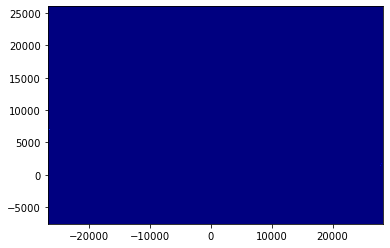

In [9]:
DiffX = np.array(branch1["DiffX"].array())
DiffY = np.array(branch1["DiffY"].array())
plt.figure(1)
[h,xedg,yedg,img]=plt.hist2d(DiffX,DiffY, bins=(4100, 4100), cmap=plt.cm.jet)
plt.show()

(array([     0.,      0.,      0.,      0.,      0., 163788.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

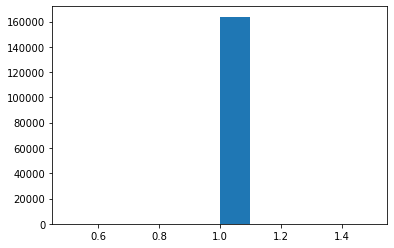

In [10]:
# TrackN 
trackN
plt.hist(trackN)


In [11]:
len(trackN)

163788

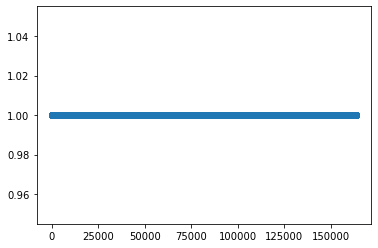

In [12]:
plt.plot(trackN,'o')

eventNumber (163788,)
eventNumber [ 5 11 14 15]


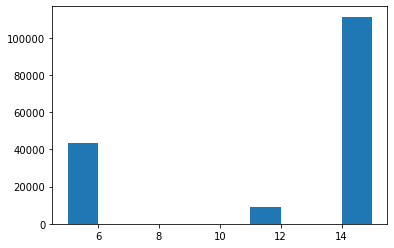

In [13]:
eventNumber
plt.hist(eventNumber)
print('eventNumber',eventNumber.shape)
print('eventNumber',np.unique(eventNumber))

In [14]:
len(eventNumber)

163788

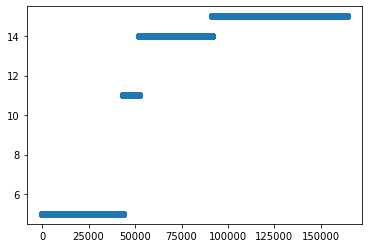

In [15]:
plt.plot(eventNumber,'o')

## ETot_CCD

In [16]:
branch2 = file['ETot_CCD1;1']

In [17]:
branch2

<TH1D (version 2) at 0x02d54171ab00>

In [18]:
#Retorna el nombre del brach TH1D
branch2.name

'ETot_CCD1'

In [19]:
branch2.behaviors[0].values

<function uproot.behaviors.TH1.TH1.values(self, flow=False)>

In [20]:
branch2.axis('x')

<TAxis (version 10) at 0x02d5421fa0f0>

In [21]:
branch2.values(flow=False)

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
branch2.counts(flow=False)

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
#Pasa a numpy los valores dentro del THD1
x=branch2.to_numpy(flow=False, dd=False)
x

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.000e+00, 1.000e+00, 2.000e+00, ..., 5.998e+03, 5.999e+03,
        6.000e+03]))

In [24]:
branch2.to_hist(metadata={'name': 'fName', 'title': 'fTitle'}, axis_metadata={'name': 'fName', 'title': 'fTitle'})

Hist(Regular(6000, 0, 6000, name='xaxis', label='xaxis'), storage=Double()) # Sum: 4.0

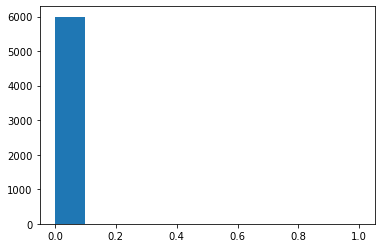

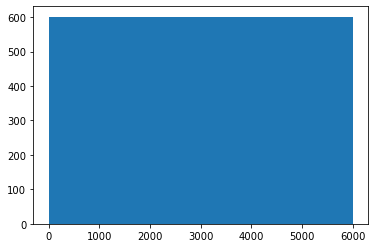

In [25]:
plt.figure(1)
plt.hist(x[0], bins=10)
plt.show()
plt.figure(2)
plt.hist(x[1], bins=10)
plt.show()

In [26]:
print("Shape of x[0] ",x[0].shape)
print("Shape of x[1] ",x[1].shape)

Shape of x[0]  (6000,)
Shape of x[1]  (6001,)


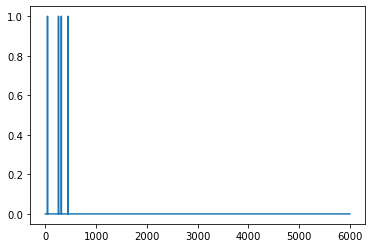

In [27]:
plt.plot(x[1][0:6000],x[0],'-')

## Primary energy

In [28]:
branch3 = file['Primary energy']

In [29]:
branch3

<TH1D (version 2) at 0x02d5422fdd30>

In [30]:
branch3.to_hist(metadata={'name': 'fName', 'title': 'fTitle'}, axis_metadata={'name': 'fName', 'title': 'fTitle'})

Hist(Regular(1024, 0, 4000, name='xaxis', label='xaxis'), storage=Double()) # Sum: 0.0 (15.0 with flow)

In [31]:
x3=branch3.to_numpy(flow=False, dd=False)
x3

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 3.90625000e+00, 7.81250000e+00, ...,
        3.99218750e+03, 3.99609375e+03, 4.00000000e+03]))

In [32]:
print("Shape of x3[0] ",x3[0].shape)
print("Shape of x3[1] ",x3[1].shape)

Shape of x3[0]  (1024,)
Shape of x3[1]  (1025,)


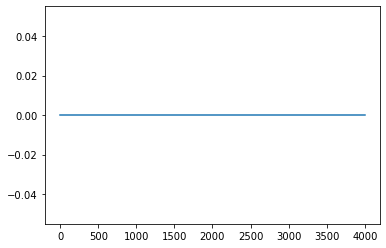

In [33]:
plt.plot(x3[1][0:1024],x3[0],'-')

## allCCD1;1

In [34]:
branch4 = file['allCCD1;1']

In [35]:
branch4

<TTree 'allCCD1' (4 branches) at 0x02d54289d9b0>

In [36]:
branch4.keys()

['DiffX', 'DiffY', 'z', 'eventNumber']

### Branch4


- [x] DiffX 
- [x] DiffY
- [x] z
- [ ] eventNumber

In [37]:
x_ccd11 =  np.array(branch4["DiffX"].array())
y_ccd11 =  np.array(branch4["DiffY"].array())

In [38]:
x_ccd11

array([-26107.16084379, -26109.71016   , -26106.80390703, ...,
        28221.4568147 ,  28173.12915507,  28246.88143359])

In [39]:
y_ccd11

array([7051.45264019, 7050.87433174, 7050.61343815, ..., 2056.66716447,
       2062.16098581, 2093.36923716])

In [40]:
print("Shape of x_ccd11 ",x_ccd11.shape)
print("Shape of y_ccd11 ",y_ccd11.shape)

Shape of x_ccd11  (285388,)
Shape of y_ccd11  (285388,)


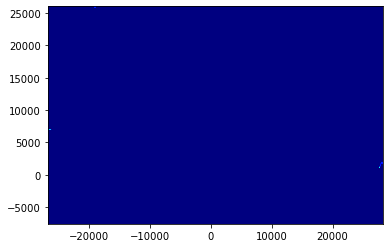

In [41]:
plt.figure(1)
plt.hist2d(x_ccd11,y_ccd11, bins=(300, 300), cmap=plt.cm.jet)
plt.show()

In [42]:
branch4['eventNumber'].tree

<TTree 'allCCD1' (4 branches) at 0x02d54289d9b0>

In [43]:
branch4['eventNumber'].cache_key

'69cbc7a0-05c0-11eb-8f04-c6e70ac8beef:/allCCD1;1:eventNumber(3)'

In [44]:
branch4['eventNumber'].name

'eventNumber'

In [45]:
x=branch4['eventNumber'].array(interpretation=None, entry_start=None, entry_stop=None, decompression_executor=None, interpretation_executor=None, array_cache='inherit', library='ak')

In [46]:
x

<Array [5, 5, 5, 5, 5, ... 15, 15, 15, 15, 15] type='285388 * int32'>

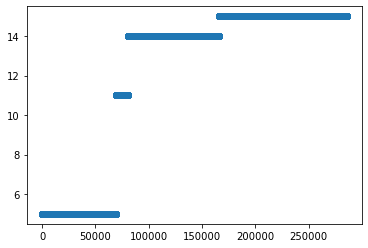

In [47]:
plt.plot(x,'o')

## hprof2d21;1

In [48]:
branch5 = file['hprof2d21;1']

In [49]:
branch5

<TH2F (version 3) at 0x02d5416768d0>

In [50]:
x5=branch5.to_numpy(flow=False, dd=False)
x5

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-30000., -29970., -29940., ...,  29940.,  29970.,  30000.]),
 array([-30750., -30735., -30720., ...,  30720.,  30735.,  30750.]))

In [51]:
print("Shape of x5[1] ",x5[1].shape)
print("Shape of x5[2] ",x5[2].shape)
print("Shape of x5[0] ",x5[0].shape)

Shape of x5[1]  (2001,)
Shape of x5[2]  (4101,)
Shape of x5[0]  (2000, 4100)


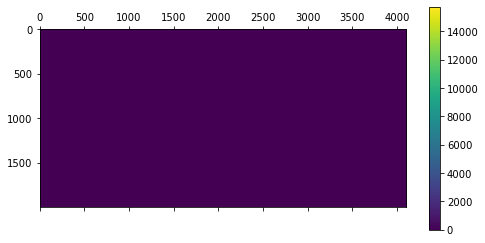

In [52]:
plt.matshow(x5[0]);
plt.colorbar()
plt.show()

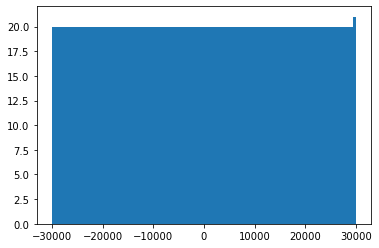

In [53]:
plt.figure(1)
plt.hist(x5[1], bins=100)
plt.show()

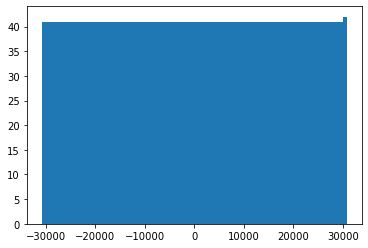

In [54]:
plt.figure(1)
plt.hist(x5[2], bins=100)
plt.show()

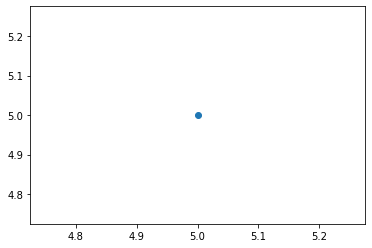

In [55]:
plt.plot(x[1],x[2],'o')